In [7]:
# import required modules
from breastshot_calcs import *
from undershot_calcs import *
from user_interface import *
from river_class import *
from payback import *

# TURBINE MODELLING, POSITION OPTIMISATION, POWER AND COST PREDICTION

This notebook will take a customer through the step by step process of assessing the installation of a PicoStream turbine at their location.

### Section 1: begins with an input of estimated river, household and turbine features


In [8]:
# Input river details

# width in meters
width = 1.2

# depth in meters
depth = 0.7

# velocity in m/s
velocity = 4

# initialise river object
river = river_obj(width, depth, velocity)

In [9]:
# initialise default PicoStream breastshot turbine object with river object as input
b_turbine = breastTurbine(river=river)

In [10]:
# initialise default household object (either small, medium or large or numeric value)
household = household('small')

### Section 2. the details of the turbine, river and household are inputted and so modelling begins



In [11]:
power, x, y = b_turbine.optimise()

print('The average power output of the turbine is: ' + str(power) + ' W')

Turbine RPM:  37.894034069498886
Optimization terminated successfully.
         Current function value: -7789.617958
         Iterations: 181
         Function evaluations: 363
The average power output of the turbine is: 7789.61795814166 W


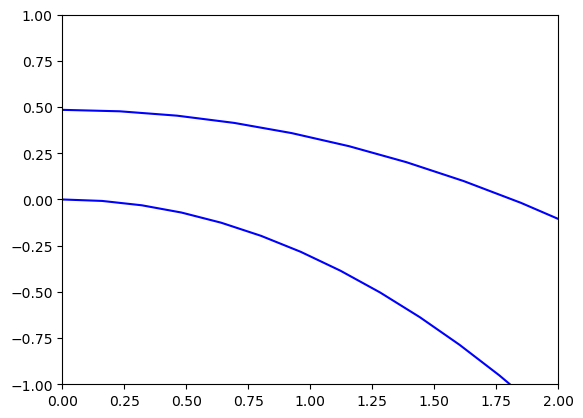

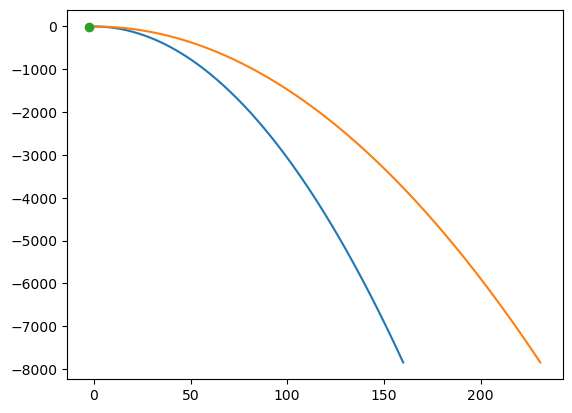

In [13]:
# plot the turbine
# reinitialise the turbine object with the optimised coordinates
b_turbine = breastTurbine(river=river, x_centre=x, y_centre=y)
b_turbine.plot_turbine()

plt.plot(river.x_bed, river.y_bed, label='River bed')
plt.plot(river.x_nappe, river.y_nappe, label='River nappe')
plt.plot(x, y, 'o', label='Turbine centre')
plt.xlim(0, 40)

### Section 3. the payback and business calculations